# RBIG Demo

In [5]:
%matplotlib inline
import sys
sys.path.insert(0, '/home/emmanuel/code/py_packages/rbig/src')
sys.path.insert(0, '/home/emmanuel/Drives/megatron/temp/2017_RBIG/')
import numpy as np
import warnings
from time import time
from rbig import RBIG
from sklearn.model_selection import train_test_split
from sklearn.utils import check_random_state
from scipy import io

import matplotlib.pyplot as plt
plt.style.use('ggplot')
warnings.filterwarnings('ignore') # get rid of annoying warnings

%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


#### Toy Data

In [8]:
!ls /home/emmanuel/Drives/megatron/temp/2017_RBIG/

2017_RBIG			made_monotonic.m
apply_RBIG_2017.m		mierda_hist_Emman.zip
CIT				multi_det_mod.m
DATA_uniform_dim_2_seed_1.mat	RBIG_2017.m
example_1.mlx			RBIG_2018.m
example_pdf_estimation.m	RBIG_jacobian_2017.m
Guido_measuring_MI_example_2.m	RBIG_probability_2017.m
Guido_measuring_MI_example.m	test_2017_vs_2018.m
Guido_measuring_MI_example.m~	toy_example_RBIG_2017.m
inv_RBIG_2017.m


In [12]:
print(data.shape, data_original.shape, R.shape)

(1000000, 2) (2, 1000000) (2, 2)


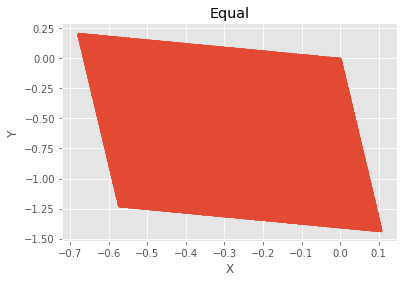

In [13]:
seed = 123
rng = np.random.RandomState(seed=seed)
aux2 = io.loadmat('/home/emmanuel/Drives/megatron/temp/2017_RBIG/DATA_uniform_dim_2_seed_1.mat')
data = aux2['dat'].T
data_original = aux2['aux'].T
R = aux2['R'].T
# num_samples = 10000
# x = np.abs(2 * rng.randn(1, num_samples))
# y = np.sin(x) + 0.25 * rng.randn(1, num_samples)
# data = np.vstack((x, y)).T

fig, ax = plt.subplots()
ax.scatter(data[:, 0], data[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Equal')
plt.show()

In [14]:
data_aux = np.dot(data_original, R)

## RBIG Fitting

In [15]:
n_layers = 1
rotation_type = 'PCA'
random_state = 123
pdf_extension = 0.1
pdf_resolution = 1000

# Initialize RBIG class
rbig_model = RBIG(n_layers=n_layers, rotation_type=rotation_type, random_state=random_state, 
                  pdf_extension=0.1, pdf_resolution=100)

# fit model to the data
rbig_model.fit(data);

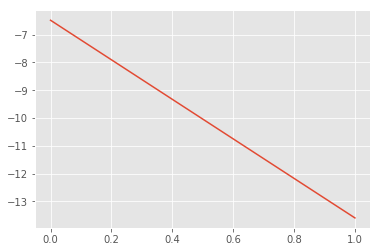

In [19]:
jacobian, data_transform2 = rbig_model.jacobian(data[:1000, :])

dd = np.zeros(jacobian.shape[1])
for i in range(jacobian.shape[1]):
    dd[i] = np.linalg.det(jacobian[i, :, :])
    
fig, ax = plt.subplots()
ax.plot(dd)
plt.show()

### Transform Data into Gaussian

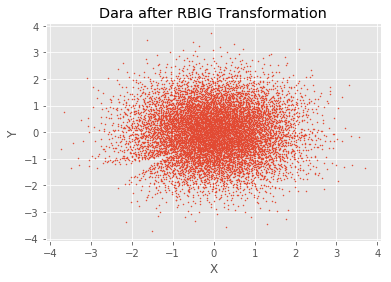

In [5]:
# transform data
data_trans = rbig_model.transform(data)

fig, ax = plt.subplots()
ax.scatter(data_trans[:, 0], data_trans[:, 1], s=1)
ax.set_xlabel('X')
ax.set_ylabel('Y')
ax.set_title('Dara after RBIG Transformation')
plt.show()

## BUCLE

In [23]:
%%time 

n_layers = 1000
rotation_type = 'PCA'
random_state = 123
pdf_extension = 0.1
pdf_resolution = 1000
n_samples = 10000

R = np.array([[10, 0.5, 1, 7], [50, -3, 5, -5], [2, -3, 5, 4], [-2, -3, 5, 4]])
MIS = np.zeros(100)

for i in range(100):
    aux = np.random.rand(n_samples, 4)
    dat = np.dot(aux, R)
    rbig_model = RBIG(n_layers=n_layers, rotation_type=rotation_type, pdf_extension=pdf_extension,
                      pdf_resolution=pdf_resolution)
    g_data = rbig_model.fit(dat).transform(dat)
    
    di = rbig_model.residual_info
    
    MIS[i] = sum(di)
    print(i)

# # Initialize RBIG class
# rbig_model = RBIG(n_layers=n_layers, rotation_type=rotation_type, random_state=random_state, 
#                   pdf_extension=0.1, pdf_resolution=100)

# # fit model to the data
# rbig_model.fit(data);

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19
20
21
22
23
24
25
26


KeyboardInterrupt: 

AttributeError: 'AxesSubplot' object has no attribute 'show'

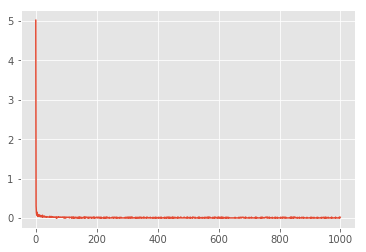

In [24]:
fig, ax = plt.subplots()

ax.plot(di)
ax.show()

AttributeError: 'AxesSubplot' object has no attribute 'show'

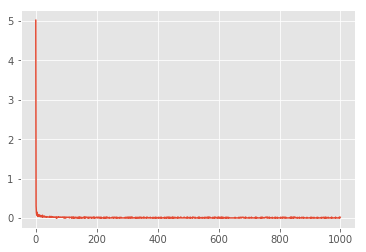

In [25]:
fig, ax = plt.subplots()

ax.plot(di)
ax.show(MIS)

In [ ]:
print(MIS.mean(), MIS.std())